In [ ]:
"""
DATASET DE LOS DATOS DIARIOS DE LAS CONDICIONES METEOROLOGICAS EN DOS REGIONES DE ALGERIA
DURANTE LA TEMPORADA DE INCENDIOS, Y SI OCURRIO O NO UN INCENDIO EN EL DIA DADO
"""

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

LIMPIEZA DE DATOS

In [6]:
df1 = pd.read_csv("Algerian_forest_fires_dataset.csv")
df1 = df1.rename({"Temperature": "temp", ' RH': "RH", ' Ws': "wind", 'Rain ': "rain"}, axis="columns")
df1.dropna(axis=0, how="any", inplace=True)
df1 = df1.drop(df1[df1["Classes  "]=='Classes  '].index)

noFire = {'not fire   ': 1, 'fire   ': 0, 'fire': 0, 'fire ': 0, 'not fire': 1, 'not fire ': 1, 'not fire     ': 1, 'not fire    ': 1}
df1["Classes  "] = df1['Classes  '].map(noFire)


#fireData = df1[['temp', 'RH', 'wind', 'rain', 'FFMC', 'DMC', 'DC', 'Classes  ']]
fireData = df1[['FFMC', 'DMC', 'DC', 'Classes  ']]
print(df1)

    day month  year temp  RH wind  rain  FFMC  DMC    DC  ISI   BUI  FWI   
0     1     6  2012   29  57   18     0  65.7  3.4   7.6  1.3   3.4  0.5  \
1     2     6  2012   29  61   13   1.3  64.4  4.1   7.6    1   3.9  0.4   
2     3     6  2012   26  82   22  13.1  47.1  2.5   7.1  0.3   2.7  0.1   
3     4     6  2012   25  89   13   2.5  28.6  1.3   6.9    0   1.7    0   
4     5     6  2012   27  77   16     0  64.8    3  14.2  1.2   3.9  0.5   
..   ..   ...   ...  ...  ..  ...   ...   ...  ...   ...  ...   ...  ...   
242  26     9  2012   30  65   14     0  85.4   16  44.5  4.5  16.9  6.5   
243  27     9  2012   28  87   15   4.4  41.1  6.5     8  0.1   6.2    0   
244  28     9  2012   27  87   29   0.5  45.9  3.5   7.9  0.4   3.4  0.2   
245  29     9  2012   24  54   18   0.1  79.7  4.3  15.2  1.7   5.1  0.7   
246  30     9  2012   24  64   15   0.2  67.3  3.8  16.5  1.2   4.8  0.5   

     Classes    
0            1  
1            1  
2            1  
3            1  
4 

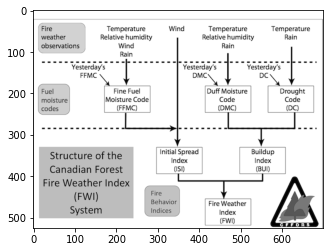

In [12]:
"""
SE CONSIDERAN UNICAMENTE LAS COLUMNAS CON LOS DATOS DE LOS INDICADORES
- FINE FUEL MOISTURE CODE (FFMC). HUMEDAD DEL COMBUSTIBLE FINO CUBIERTO POR EL BOSQUE (HOJARASCA Y RAMAS PEQUENAS)
- DUFF MOISTURE CODE (DMC). HUMEDAD DE LA MATERIA ORGANICA DESCOMPUESTA BAJO LA HOJARASCA
- DROUGHT CODE (DC). SEQUEDAD DEL SUELO

SE UTILIZAN PARA CALCULAR EL INITIAL SPREAD INDEX (ISI), LA CAPACIDAD DE PROPAGACION INICIAL DEL FUEGO
Y EL BUILDUP INDEX (BUI) LIBERACION DE CALOR POTENCIAL DE LOS COMBUSTIBLES MAS PESADOS

AMBOS, A SU VEZ, SE USAN PARA CALCULAR EL FIRE WEATHER INDEX FWI (FWI), LA INTENSIDAD POTENCIAL DEL FUEGO
"""
im = cv2.imread("/home/juancho/Documents/Personalizadas/DataScience/Final/fwiFlowchart.png",0)
plt.imshow(im,cmap="gray")

PREPARACION DE ARREGLOS DE ENTRENAMIENTO Y DE PRUEBA

In [272]:
features = fireData.columns[:-1]
x = fireData[features]
y = fireData[['Classes  ']]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.3, random_state=0)

ENTRENAMIENTO DEL MODELO Y PREDICCION CON LOS DATOS

In [273]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x,y)

yPred = dtree.predict(xTest)
#tree.plot_tree(dtree, feature_names=features)

Score:  1.0


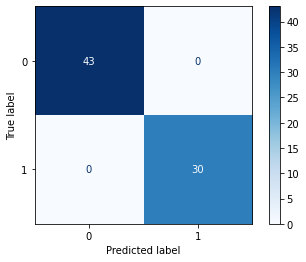

In [274]:
print("Score: ", dtree.score(xTest,yTest))

mtz = confusion_matrix(yTest,yPred)
ConfusionMatrixDisplay(mtz).plot(cmap=plt.cm.Blues)

RANDOM FOREST PARA EL DATASET

Score:  0.9315068493150684


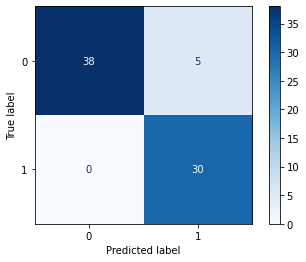

In [275]:
forest = RandomForestClassifier(n_estimators=50)
forest.fit(xTrain,yTrain)
yPred = forest.predict(xTest)

print("Score: ", forest.score(xTest, yTest))

mtz = confusion_matrix(yTest, yPred)
ConfusionMatrixDisplay(mtz).plot(cmap=plt.cm.Blues)

DATASET DEL AREA QUEMADA EN INCENDIOS EN UN PARQUE DE PORTUGAL DURANTE 2007

In [ ]:
"""
LOS DATOS POR DEBAJO DEL AREA DE TOLERANCIA (MENOS DE UNA HECTAREA) SE TOMAN COMO
INCENDIOS TAN PEQUENOS QUE SE OBVIAN (COMO SI NO HUBIERA HABIDO INCENDIO)
"""

In [276]:
df = pd.read_csv("forestfires.csv")
tolerancia = 0

#data = df[["temp", "RH", "wind", "rain", 'FFMC', 'DMC', 'DC', "area"]]
data = df[['FFMC', 'DMC', 'DC', "area"]]

print(df.columns)
print("======================================")

dic = {True: 1, False: 0}
data["go"] = data["area"] <= tolerancia
data["go"] = data["go"].map(dic)

features = data.columns[:-1]
x = data[features].drop("area", axis=1)
y = data[["go"]]
"""
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.3, random_state=0)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x,y)

yPred = dtree.predict(xTest)

print("Score: ", dtree.score(xTest,yTest))

mtz = confusion_matrix(yTest,yPred)
ConfusionMatrixDisplay(mtz).plot(cmap=plt.cm.Blues)
forest = RandomForestClassifier(n_estimators=50)
forest.fit(xTrain,yTrain)
yPred = forest.predict(xTest)

print("Score: ", forest.score(xTest, yTest))

mtz = confusion_matrix(yTest, yPred)
ConfusionMatrixDisplay(mtz).plot(cmap=plt.cm.Blues)
"""

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


'\nxTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.3, random_state=0)\n\ndtree = DecisionTreeClassifier()\ndtree = dtree.fit(x,y)\n\nyPred = dtree.predict(xTest)\n\nprint("Score: ", dtree.score(xTest,yTest))\n\nmtz = confusion_matrix(yTest,yPred)\nConfusionMatrixDisplay(mtz).plot(cmap=plt.cm.Blues)\nforest = RandomForestClassifier(n_estimators=50)\nforest.fit(xTrain,yTrain)\nyPred = forest.predict(xTest)\n\nprint("Score: ", forest.score(xTest, yTest))\n\nmtz = confusion_matrix(yTest, yPred)\nConfusionMatrixDisplay(mtz).plot(cmap=plt.cm.Blues)\n'

In [ ]:
"""
PREDICCION DE INCENDIOS PARA EL DATASET DE PORTUGAL 
POR MEDIO DEL MODELO HECHO PARA LAS REGIONES DE ALGERIA
"""

Score:  0.5338491295938105


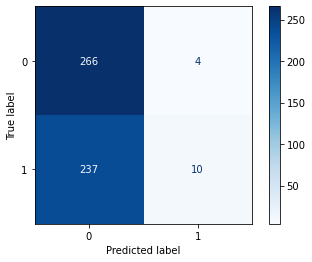

In [277]:
yPred = dtree.predict(x)

print("Score: ", dtree.score(x,y))

mtz = confusion_matrix(y,yPred)
ConfusionMatrixDisplay(mtz).plot(cmap=plt.cm.Blues)

#print(x)

In [ ]:
"""
LA INCONSISTENCIA SE DEBE A QUE LOS INDICES SON CALCULADOS DE MANERA DIFERENTE EN CADA PAIS
ESTANDARIZANDO LO VALORES DEBERIA PODER USARSE CONFIABLEMENTE EN CUALQUIER LUGAR DEL MUNDO
"""